In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [18]:
# Load the dataset
file_path = "datasets/fuel.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset information
print("\nDataset Information:")
display(df.info())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Summary statistics of the dataset
print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


None


Missing values in each column:


YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


Summary Statistics:


,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [ ]:
# Display the column names
print("Columns in the dataset:")
print(df.columns.tolist())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    # Remove duplicates if any
    df = df.drop_duplicates()
    print(f"Duplicate rows removed. New shape: {df.shape}")

print("\nCorrelation with CO2 Emissions:")
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_with_co2 = numeric_df.corr()['EMISSIONS'].sort_values(ascending=False)
display(correlation_with_co2)

Columns in the dataset:
['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

Number of duplicate rows: 1
Duplicate rows removed. New shape: (22555, 13)

Correlation with CO2 Emissions:


EMISSIONS           1.000000
COMB (L/100 km)     0.922975
FUEL CONSUMPTION    0.919094
HWY (L/100 km)      0.894767
ENGINE SIZE         0.821308
CYLINDERS           0.802164
YEAR               -0.047733
COMB (mpg)         -0.901839
Name: EMISSIONS, dtype: float64

## 3. Linear Regression with Engine Size as Independent Variable

In [20]:
# Select Engine Size as independent variable (X) and CO2 Emissions as dependent variable (y)
X = df[['ENGINE SIZE']].values
y = df['EMISSIONS'].values

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 15788 samples
Testing set size: 6767 samples


In [21]:
# Apply simple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print the model coefficients
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (Engine Size): {model.coef_[0]:.4f}")
print(f"Linear Regression Equation: CO2 Emissions = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Engine Size")

Model Intercept: 126.7223
Model Coefficient (Engine Size): 36.6965
Linear Regression Equation: CO2 Emissions = 126.7223 + 36.6965 * Engine Size


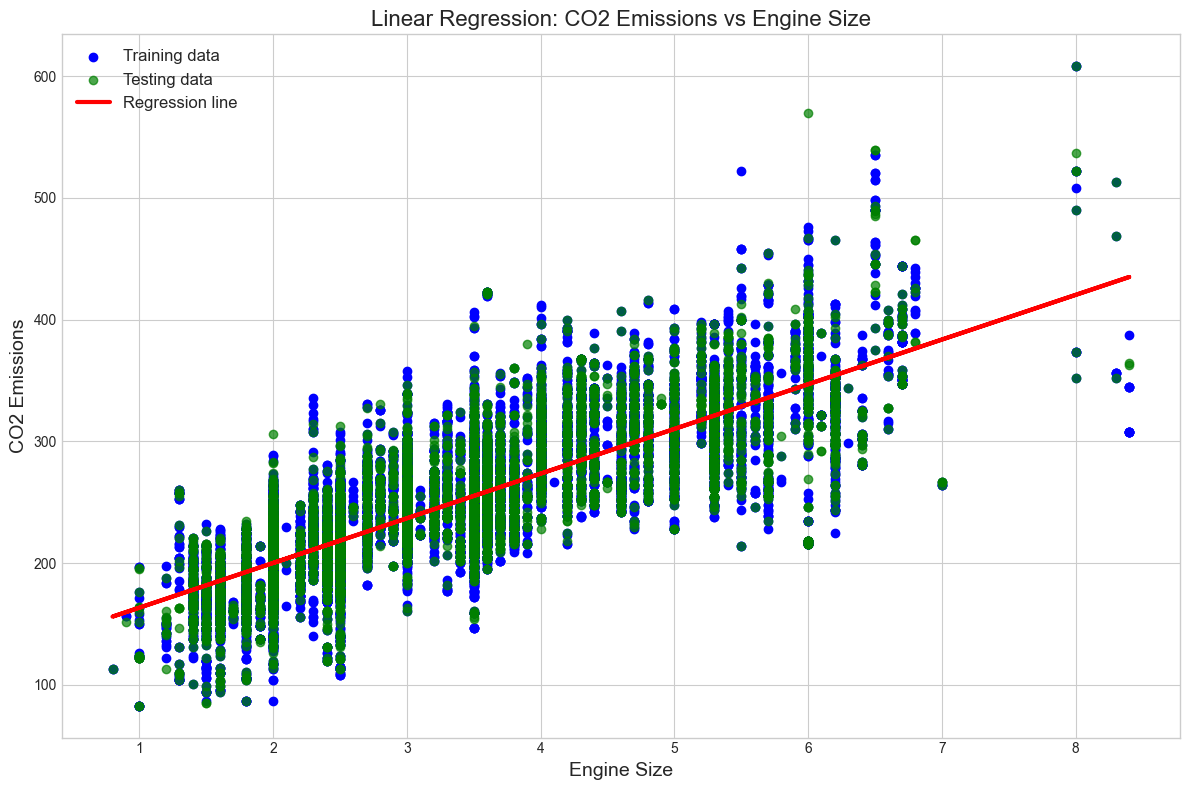

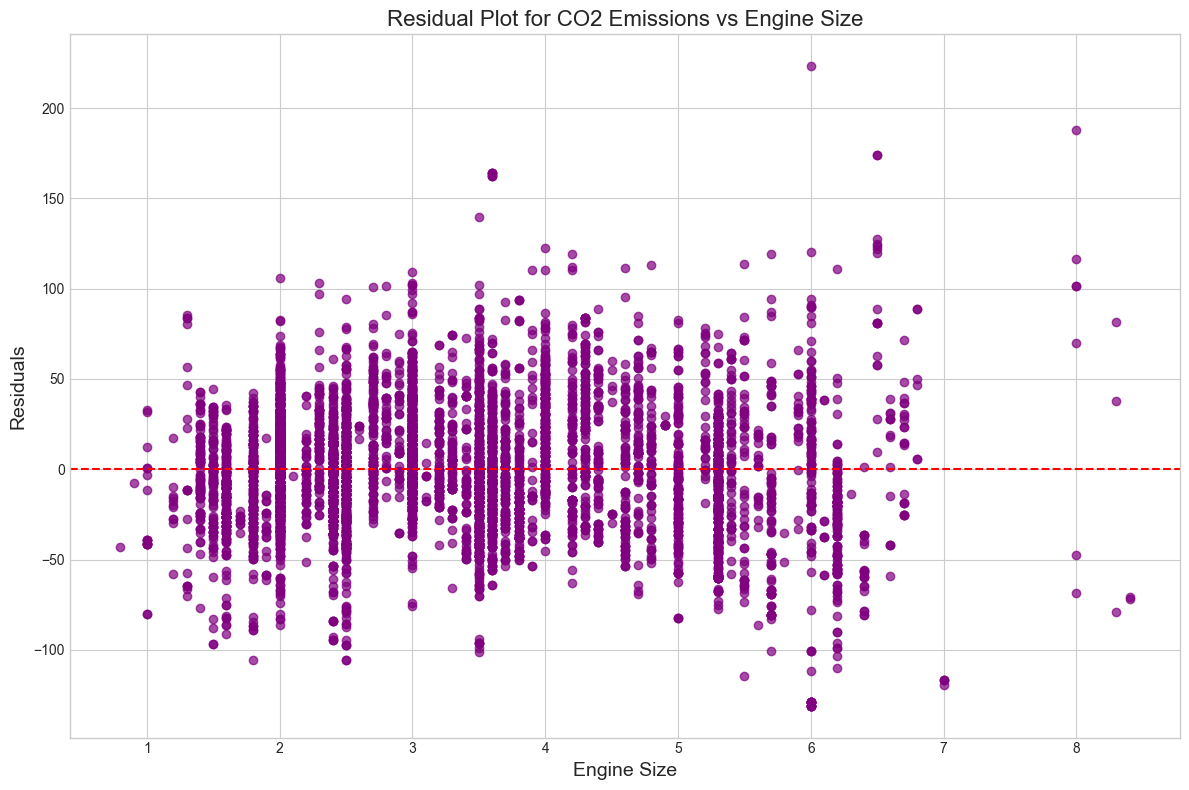

In [22]:
# Visualize the sample points and regression results
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.7, label='Testing data')
plt.plot(X_train, y_train_pred, color='red', linewidth=3, label='Regression line')

plt.title('Linear Regression: CO2 Emissions vs Engine Size', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('CO2 Emissions', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a residual plot to check if linear regression assumptions are met
plt.figure(figsize=(12, 8))
residuals = y_test - y_test_pred
plt.scatter(X_test, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for CO2 Emissions vs Engine Size', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Compute R-squared Score and other evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"R-squared Score (Training): {r2_train:.4f}")
print(f"R-squared Score (Testing): {r2_test:.4f}")
print(f"Mean Squared Error (Testing): {mse_test:.4f}")
print(f"Root Mean Squared Error (Testing): {rmse_test:.4f}")

# Interpret the R-squared Score
print("\nInterpretation of R-squared Score:")
if r2_test > 0.7:
    print(f"The R-squared value of {r2_test:.4f} indicates that approximately {r2_test*100:.2f}% of the variance in CO2 emissions")
    print("can be explained by the engine size. This suggests a strong relationship between engine size and CO2 emissions.")
elif r2_test > 0.5:
    print(f"The R-squared value of {r2_test:.4f} indicates that approximately {r2_test*100:.2f}% of the variance in CO2 emissions")
    print("can be explained by the engine size. This suggests a moderate relationship between engine size and CO2 emissions.")
else:
    print(f"The R-squared value of {r2_test:.4f} indicates that only {r2_test*100:.2f}% of the variance in CO2 emissions")
    print("can be explained by the engine size. This suggests a weak relationship between engine size and CO2 emissions.")

R-squared Score (Training): 0.6779
R-squared Score (Testing): 0.6665
Mean Squared Error (Testing): 1169.8405
Root Mean Squared Error (Testing): 34.2029

Interpretation of R-squared Score:
The R-squared value of 0.6665 indicates that approximately 66.65% of the variance in CO2 emissions
can be explained by the engine size. This suggests a moderate relationship between engine size and CO2 emissions.


## 4. Identifying Another Influential Independent Variable

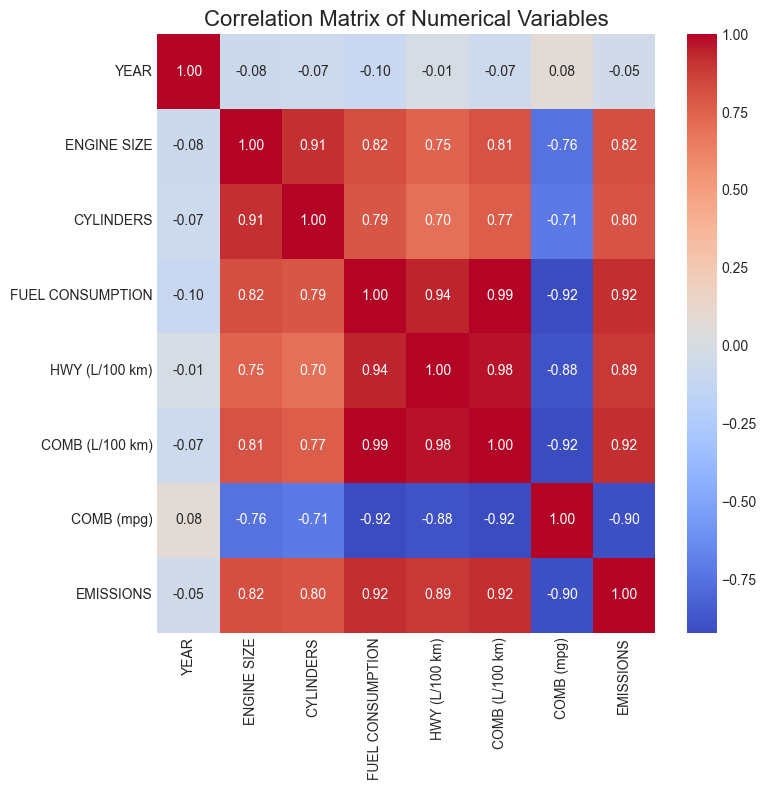

<Figure size 800x800 with 0 Axes>

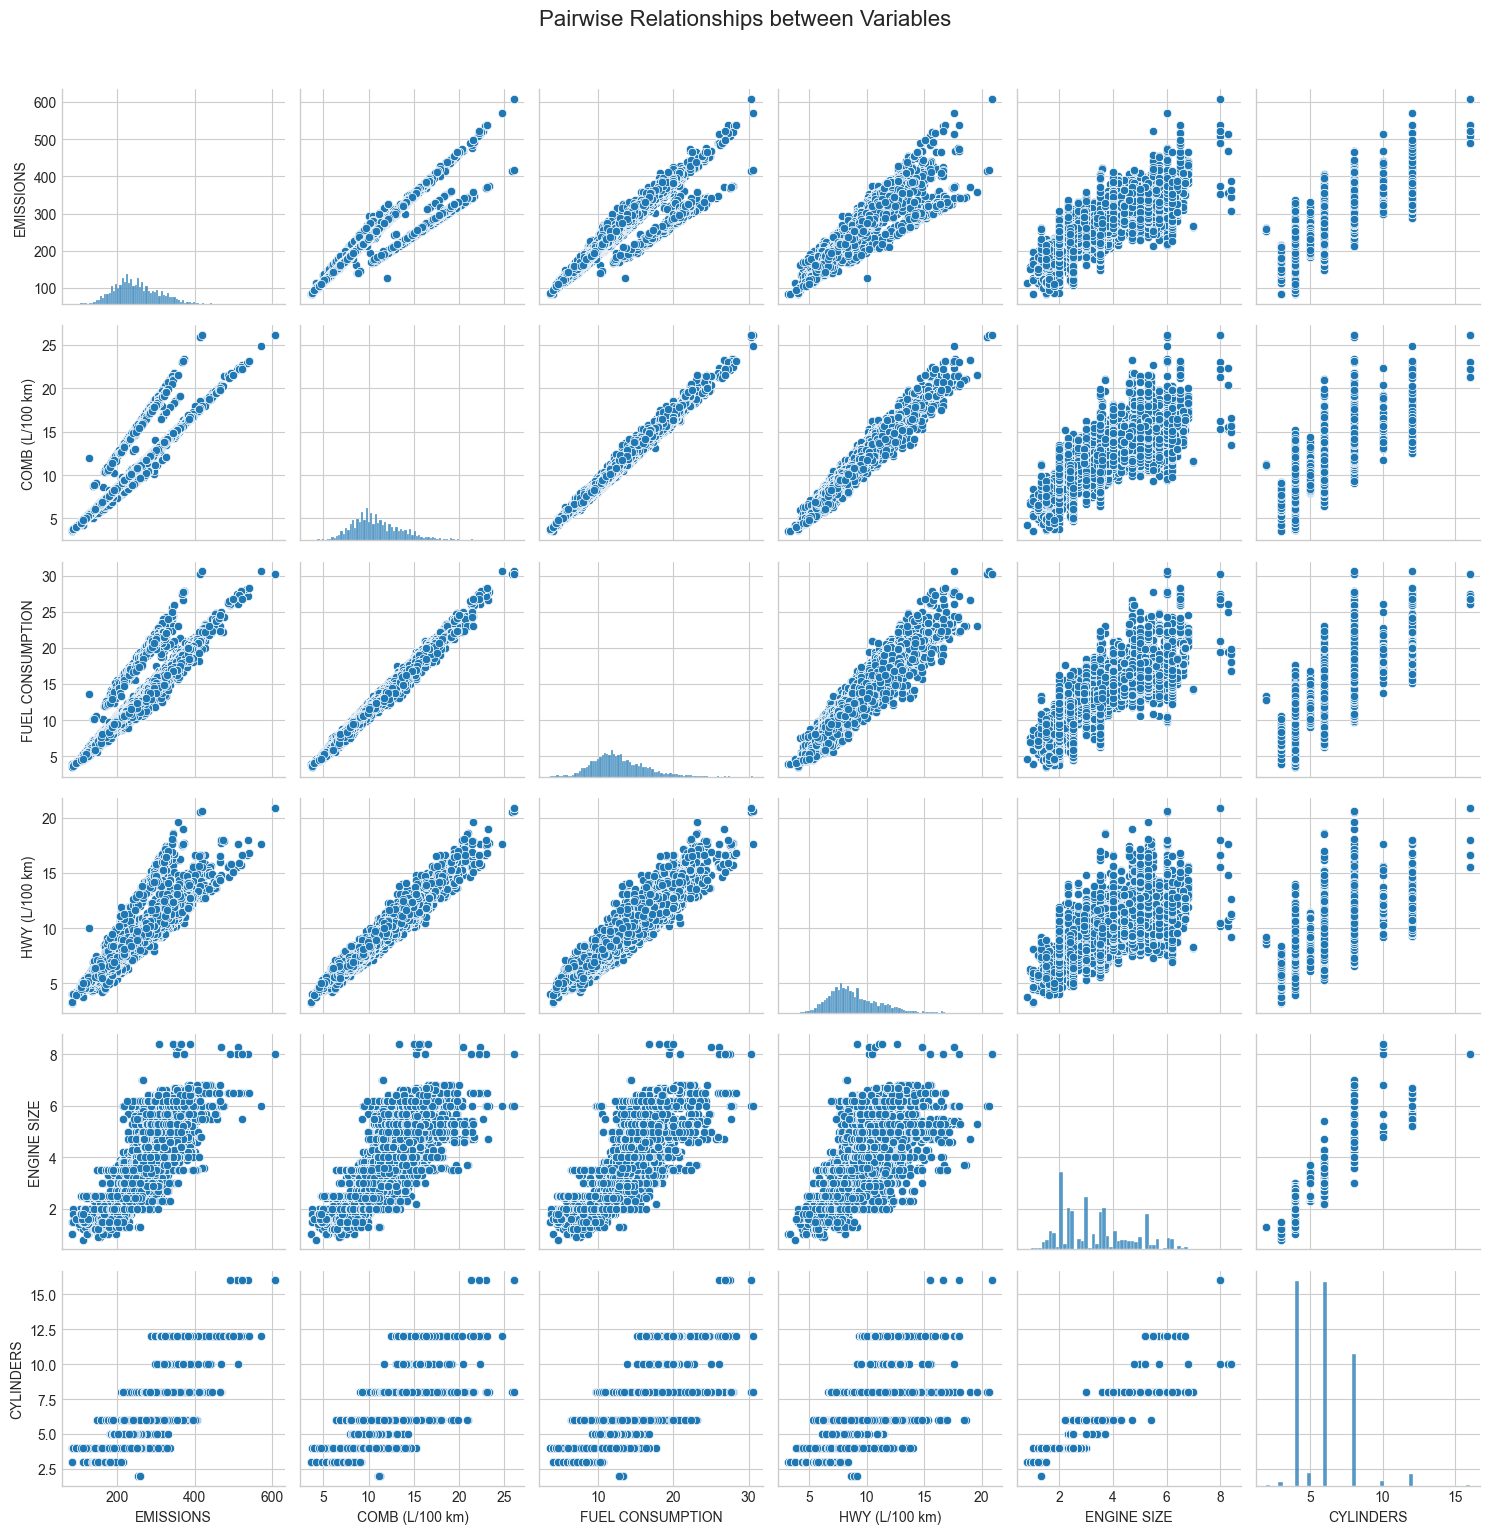


Potential influential variables based on correlation with CO2 Emissions:


EMISSIONS           1.000000
COMB (L/100 km)     0.922975
FUEL CONSUMPTION    0.919094
HWY (L/100 km)      0.894767
ENGINE SIZE         0.821308
CYLINDERS           0.802164
Name: EMISSIONS, dtype: float64


Based on correlation analysis, COMB (L/100 km) is selected as another influential variable for CO2 Emissions.


In [ ]:

plt.figure(figsize=(8, 8))
# Select only numeric columns for correlation calculation
numeric_df_for_corr = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()


numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

if len(numerical_columns) > 6:
   
    top_correlated = correlation_with_co2.index[1:6].tolist()  
    plot_columns = ['EMISSIONS'] + top_correlated
else:
    plot_columns = numerical_columns

plot_columns = [col for col in plot_columns if col in numerical_columns]

plt.figure(figsize=(8, 8))
sns.pairplot(df[plot_columns])
plt.suptitle('Pairwise Relationships between Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Based on correlation and visual analysis, identify another influential variable
print("\nPotential influential variables based on correlation with CO2 Emissions:")
display(correlation_with_co2.head(6))  

# Select the second most correlated variable (after Engine Size)

second_best_predictor = correlation_with_co2.index[1]
if second_best_predictor == 'ENGINE SIZE':
    second_best_predictor = correlation_with_co2.index[2]

print(f"\nBased on correlation analysis, {second_best_predictor} is selected as another influential variable for CO2 Emissions.")

## 5. Linear Regression with the Second Independent Variable

In [ ]:
# Apply simple linear regression with the second influential variable
X2 = df[[second_best_predictor]].values
y2 = df['EMISSIONS'].values

# Split the data into training and testing sets (70% training, 30% testing)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(f"Training set size: {X2_train.shape[0]} samples")
print(f"Testing set size: {X2_test.shape[0]} samples")

Training set size: 15788 samples
Testing set size: 6767 samples


In [ ]:
# Apply simple linear regression for the second variable
model2 = LinearRegression()
model2.fit(X2_train, y2_train)


y2_train_pred = model2.predict(X2_train)
y2_test_pred = model2.predict(X2_test)

# Print the model coefficients
print(f"Model Intercept: {model2.intercept_:.4f}")
print(f"Model Coefficient ({second_best_predictor}): {model2.coef_[0]:.4f}")
print(f"Linear Regression Equation: CO2 Emissions = {model2.intercept_:.4f} + {model2.coef_[0]:.4f} * {second_best_predictor}")

Model Intercept: 41.2828
Model Coefficient (COMB (L/100 km)): 18.9324
Linear Regression Equation: CO2 Emissions = 41.2828 + 18.9324 * COMB (L/100 km)


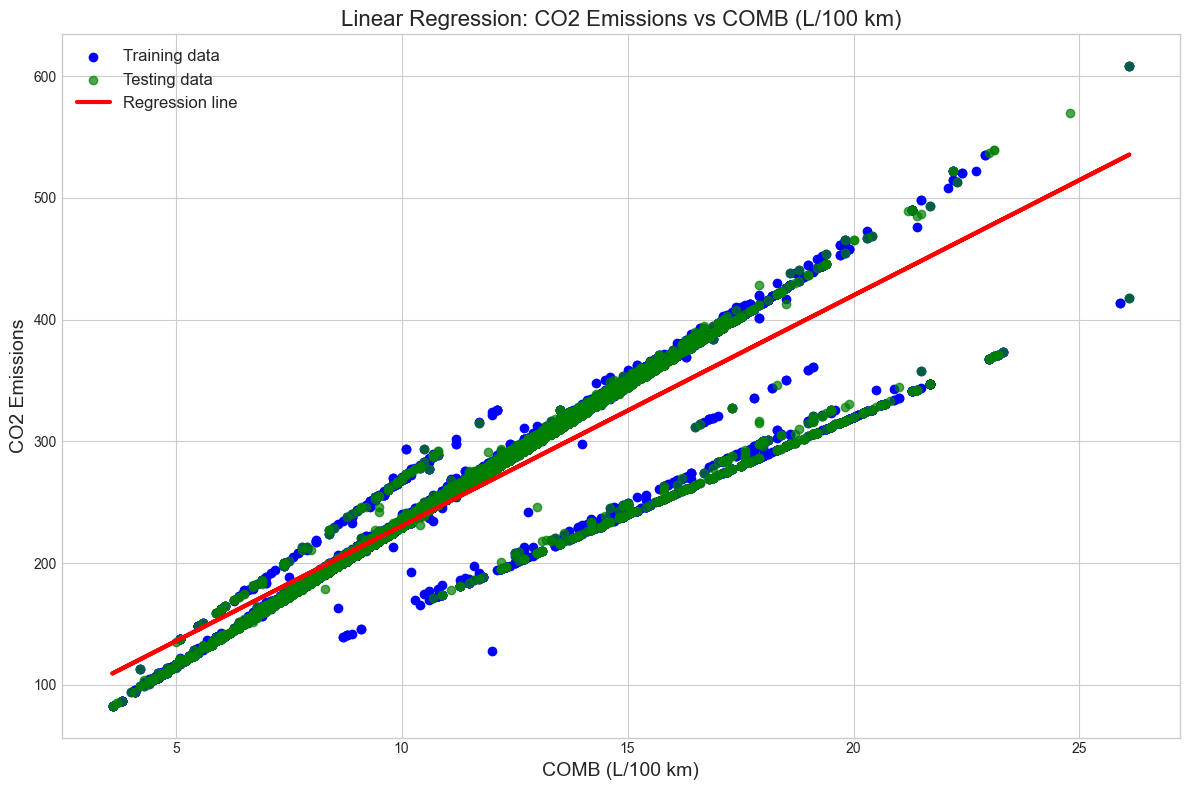

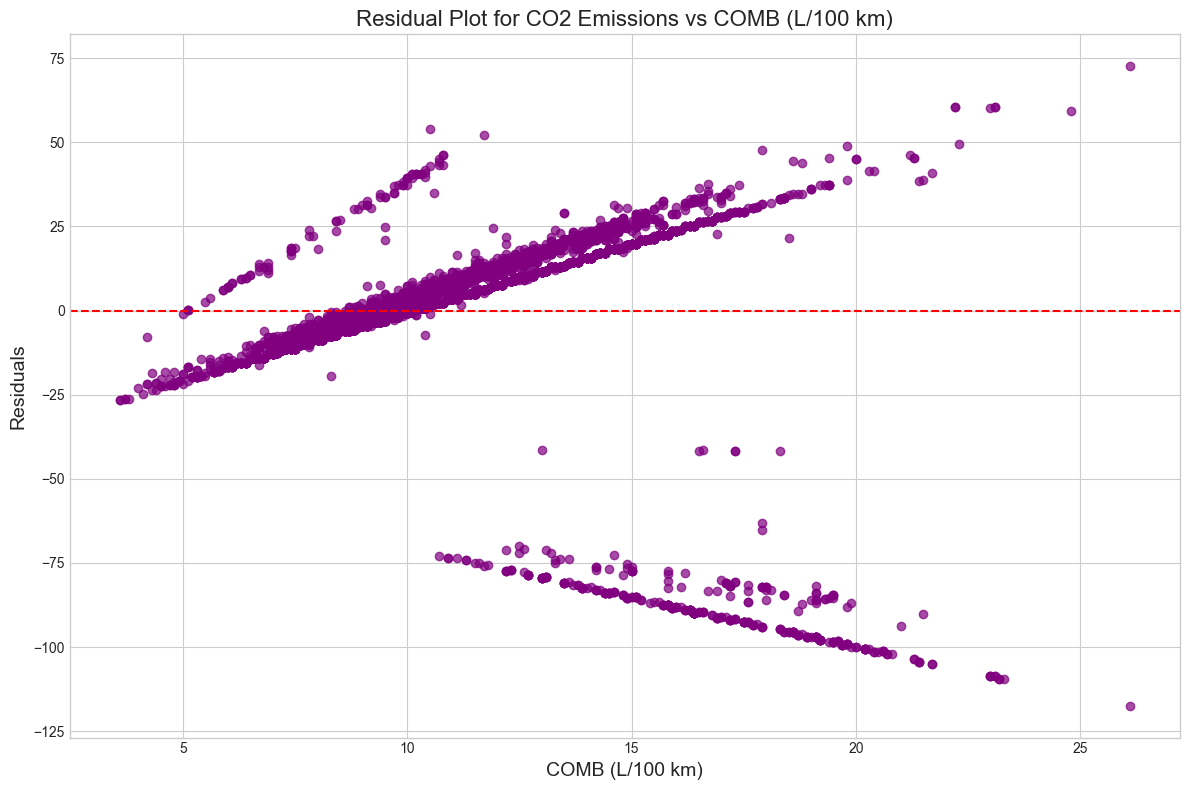

In [29]:
# Visualize the sample points and regression results for the second variable
plt.figure(figsize=(12, 8))
plt.scatter(X2_train, y2_train, color='blue', label='Training data')
plt.scatter(X2_test, y2_test, color='green', alpha=0.7, label='Testing data')
plt.plot(X2_train, y2_train_pred, color='red', linewidth=3, label='Regression line')

plt.title(f'Linear Regression: CO2 Emissions vs {second_best_predictor}', fontsize=16)
plt.xlabel(second_best_predictor, fontsize=14)
plt.ylabel('CO2 Emissions', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a residual plot to check if linear regression assumptions are met
plt.figure(figsize=(12, 8))
residuals2 = y2_test - y2_test_pred
plt.scatter(X2_test, residuals2, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residual Plot for CO2 Emissions vs {second_best_predictor}', fontsize=16)
plt.xlabel(second_best_predictor, fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Compute R-squared Score and other evaluation metrics for the second model
r2_train2 = r2_score(y2_train, y2_train_pred)
r2_test2 = r2_score(y2_test, y2_test_pred)
mse_test2 = mean_squared_error(y2_test, y2_test_pred)
rmse_test2 = np.sqrt(mse_test2)

print(f"R-squared Score (Training): {r2_train2:.4f}")
print(f"R-squared Score (Testing): {r2_test2:.4f}")
print(f"Mean Squared Error (Testing): {mse_test2:.4f}")
print(f"Root Mean Squared Error (Testing): {rmse_test2:.4f}")

# Interpret the R-squared Score
print("\nInterpretation of R-squared Score:")
if r2_test2 > 0.7:
    print(f"The R-squared value of {r2_test2:.4f} indicates that approximately {r2_test2*100:.2f}% of the variance in CO2 emissions")
    print(f"can be explained by the {second_best_predictor}. This suggests a strong relationship between {second_best_predictor} and CO2 emissions.")
elif r2_test2 > 0.5:
    print(f"The R-squared value of {r2_test2:.4f} indicates that approximately {r2_test2*100:.2f}% of the variance in CO2 emissions")
    print(f"can be explained by the {second_best_predictor}. This suggests a moderate relationship between {second_best_predictor} and CO2 emissions.")
else:
    print(f"The R-squared value of {r2_test2:.4f} indicates that only {r2_test2*100:.2f}% of the variance in CO2 emissions")
    print(f"can be explained by the {second_best_predictor}. This suggests a weak relationship between {second_best_predictor} and CO2 emissions.")

R-squared Score (Training): 0.8557
R-squared Score (Testing): 0.8427
Mean Squared Error (Testing): 551.7402
Root Mean Squared Error (Testing): 23.4892

Interpretation of R-squared Score:
The R-squared value of 0.8427 indicates that approximately 84.27% of the variance in CO2 emissions
can be explained by the COMB (L/100 km). This suggests a strong relationship between COMB (L/100 km) and CO2 emissions.


## 6. Comparison of the Two Models

,Model,R-squared (Training),R-squared (Testing),MSE (Testing),RMSE (Testing)
0,Engine Size,0.677884,0.666547,1169.840525,34.202932
1,COMB (L/100 km),0.855718,0.842731,551.740249,23.489152


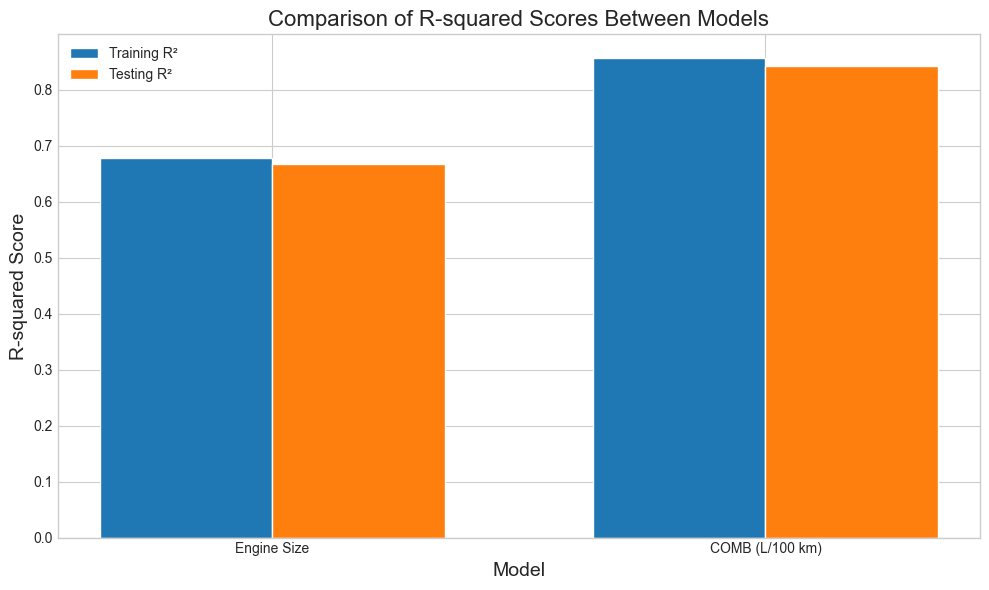


Based on the R-squared scores, the model using COMB (L/100 km) as the independent variable
performed better at predicting CO2 emissions.

Final Conclusion:
-------------------
1. Engine Size model R² = 0.6665: This means 66.65% of the variance in CO2 emissions
   can be explained by the engine size of the vehicle.
2. COMB (L/100 km) model R² = 0.8427: This means 84.27% of the variance in CO2 emissions
   can be explained by the COMB (L/100 km) of the vehicle.

The relationship between CO2 emissions and these variables is expected, as vehicles with
larger engines or higher comb (l/100 km) typically produce more CO2.

Simple linear regression provides a useful baseline model for understanding these relationships,
but more complex models incorporating multiple variables could potentially yield even better predictions.


In [31]:
# Compare the performance of both models
comparison_data = {
    'Model': ['Engine Size', second_best_predictor],
    'R-squared (Training)': [r2_train, r2_train2],
    'R-squared (Testing)': [r2_test, r2_test2],
    'MSE (Testing)': [mse_test, mse_test2],
    'RMSE (Testing)': [rmse_test, rmse_test2]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

# Visualize the comparison of R-squared values
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)

plt.bar(index, comparison_df['R-squared (Training)'], bar_width, label='Training R²')
plt.bar(index + bar_width, comparison_df['R-squared (Testing)'], bar_width, label='Testing R²')

plt.xlabel('Model', fontsize=14)
plt.ylabel('R-squared Score', fontsize=14)
plt.title('Comparison of R-squared Scores Between Models', fontsize=16)
plt.xticks(index + bar_width/2, ['Engine Size', second_best_predictor])
plt.legend()
plt.tight_layout()
plt.show()

# Determine which model performed better
better_model = 'Engine Size' if r2_test > r2_test2 else second_best_predictor
print(f"\nBased on the R-squared scores, the model using {better_model} as the independent variable")
print(f"performed {'better' if abs(r2_test - r2_test2) > 0.05 else 'slightly better'} at predicting CO2 emissions.")

# Final conclusion and interpretation
print("\nFinal Conclusion:")
print("-------------------")
print(f"1. Engine Size model R² = {r2_test:.4f}: This means {r2_test*100:.2f}% of the variance in CO2 emissions")
print("   can be explained by the engine size of the vehicle.")
print(f"2. {second_best_predictor} model R² = {r2_test2:.4f}: This means {r2_test2*100:.2f}% of the variance in CO2 emissions")
print(f"   can be explained by the {second_best_predictor} of the vehicle.")
print(f"\nThe relationship between CO2 emissions and these variables is expected, as vehicles with")
print(f"larger engines or higher {second_best_predictor.lower()} typically produce more CO2.")
print("\nSimple linear regression provides a useful baseline model for understanding these relationships,")
print("but more complex models incorporating multiple variables could potentially yield even better predictions.")